## Seam Carving Detection With CNN_V1

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dir = './30000/train'
validation_dir = './30000/validation'

In [4]:
from keras import layers
from keras import models
from keras import optimizers

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', input_shape=(500, 500, 3)))
model.add(layers.Activation('relu')) # this is just different syntax for specifying the activation function
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#padding='valid'
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])#RMSprop(lr=1e-4)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 500, 500, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 500, 500, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 250, 250, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [6]:
from keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(500, 500),
        #No. of images to be yielded from the generator per batch.
        batch_size=5,
        # Since we use binary_crossentropy loss, 
        #we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(500, 500),
        batch_size=5,
        class_mode='categorical')

Found 120000 images belonging to 4 classes.
Found 40000 images belonging to 4 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (5, 500, 500, 3)
labels batch shape: (5, 4)


data batch shape: (5, 500, 500, 3)
labels batch shape: (5, 4)


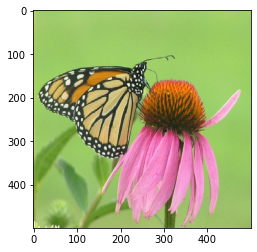

In [12]:
import matplotlib.pyplot as plt
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    plt.imshow(data_batch[0,:,:,:])       
    break

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=200,
      validation_data=validation_generator,
      validation_steps=180)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
500/500 [==============================] - 67s 135ms/step - loss: 1.3897 - acc: 0.2632 - val_loss: 1.3860 - val_acc: 0.2689
Epoch 2/200
500/500 [==============================] - 62s 125ms/step - loss: 1.3875 - acc: 0.2356 - val_loss: 1.3866 - val_acc: 0.2300
Epoch 3/200
500/500 [==============================] - 62s 125ms/step - loss: 1.3875 - acc: 0.2536 - val_loss: 1.3866 - val_acc: 0.2522
Epoch 4/200
500/500 [==============================] - 62s 125ms/step - loss: 1.3876 - acc: 0.2560 - val_loss: 1.3867 - val_acc: 0.2378
Epoch 5/200
500/500 [==============================] - 62s 125ms/step - loss: 1.3875 - acc: 0.2548 - val_loss: 1.3870 - val_acc: 0.2433
Epoch 6/200
500/500 [==============================] - 62s 124ms/step - loss: 1.3871 - acc: 0.2560 - val_loss: 1.3847 - val_acc: 0.2711
Epoch 7/200
500/500 [==============================] - 62s 124ms/step - loss: 1.3849 - acc: 0.2680 - val_loss: 1.3855 - val_acc: 0.2733


Epoch 59/200
500/500 [==============================] - 62s 125ms/step - loss: 0.4843 - acc: 0.8364 - val_loss: 0.4494 - val_acc: 0.8500
Epoch 60/200
500/500 [==============================] - 63s 125ms/step - loss: 0.4852 - acc: 0.8392 - val_loss: 0.4585 - val_acc: 0.8478
Epoch 61/200
500/500 [==============================] - 63s 125ms/step - loss: 0.4702 - acc: 0.8400 - val_loss: 0.4475 - val_acc: 0.8467
Epoch 62/200
500/500 [==============================] - 63s 125ms/step - loss: 0.4972 - acc: 0.8444 - val_loss: 0.4091 - val_acc: 0.8622
Epoch 63/200
500/500 [==============================] - 62s 125ms/step - loss: 0.4628 - acc: 0.8500 - val_loss: 0.4579 - val_acc: 0.8367
Epoch 64/200
500/500 [==============================] - 63s 125ms/step - loss: 0.4687 - acc: 0.8312 - val_loss: 0.4677 - val_acc: 0.8444
Epoch 65/200
500/500 [==============================] - 63s 125ms/step - loss: 0.4542 - acc: 0.8480 - val_loss: 0.4833 - val_acc: 0.8389
Epoch 66/200
500/500 [===================

500/500 [==============================] - 62s 125ms/step - loss: 0.4800 - acc: 0.8468 - val_loss: 0.5205 - val_acc: 0.8533
Epoch 178/200
500/500 [==============================] - 62s 125ms/step - loss: 0.4860 - acc: 0.8548 - val_loss: 0.4412 - val_acc: 0.8444
Epoch 179/200
500/500 [==============================] - 62s 125ms/step - loss: 0.4796 - acc: 0.8388 - val_loss: 0.5310 - val_acc: 0.8033
Epoch 180/200
500/500 [==============================] - 62s 125ms/step - loss: 0.5063 - acc: 0.8484 - val_loss: 0.5173 - val_acc: 0.8433
Epoch 181/200
500/500 [==============================] - 62s 125ms/step - loss: 0.4677 - acc: 0.8528 - val_loss: 0.3764 - val_acc: 0.8544
Epoch 182/200
500/500 [==============================] - 62s 125ms/step - loss: 0.4869 - acc: 0.8452 - val_loss: 0.6250 - val_acc: 0.8411
Epoch 183/200
500/500 [==============================] - 62s 125ms/step - loss: 0.5345 - acc: 0.8304 - val_loss: 0.5188 - val_acc: 0.8222
Epoch 184/200
500/500 [=========================

In [14]:
model.save('Final_SeamCarving_Detection_project.h5')

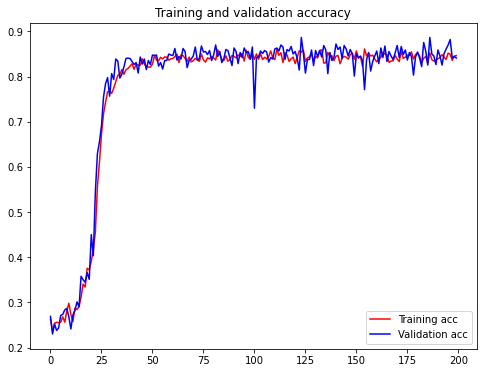

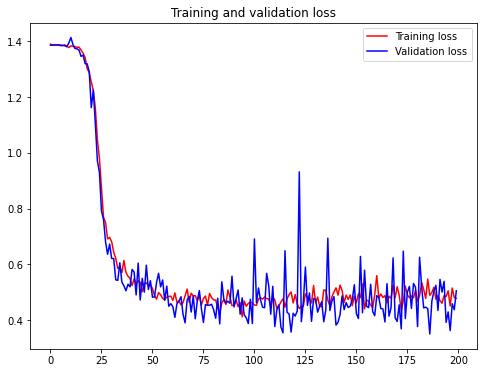

In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
test_path = './1000/validation'#test icin kullanilacak fotograflar

In [30]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [31]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
# We need to recreate our validation generator with shuffle = false

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(500, 500),
        batch_size=5,
        class_mode='categorical',
        shuffle=False)

class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())


nb_validation_samples = 1435
batch_size = 5
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

#print('Confusion Matrix')
#print(confusion_matrix(test_generator.classes, y_pred))
print("\n\n")
print('Classification Report\n')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 1440 images belonging to 4 classes.



Classification Report

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       360
          10       0.98      0.75      0.85       360
          20       0.91      0.81      0.86       360
          40       0.94      0.84      0.89       360

    accuracy                           0.84      1440
   macro avg       0.87      0.84      0.84      1440
weighted avg       0.87      0.84      0.84      1440



In [50]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [51]:
cm = confusion_matrix(test_generator.classes, y_pred)
np.set_printoptions(precision=2)

[[345   4   8   3]
 [ 73 270  12   5]
 [ 56   1 291  12]
 [ 47   1   9 303]]


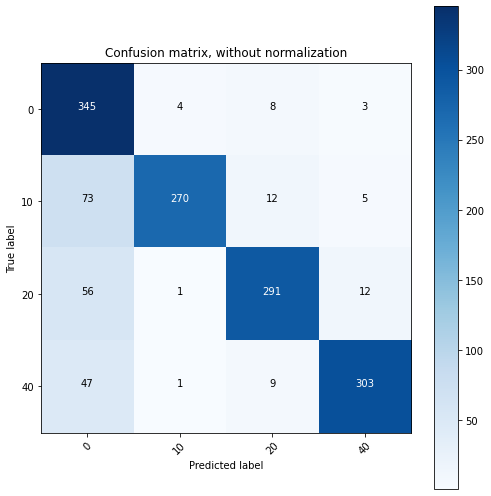

In [52]:
plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, classes=target_names,
                      title='Confusion matrix, without normalization')

In [60]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr)
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show() 

In [65]:
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1
               
    return class_id,TP, FP, TN, FN

In [66]:
print(perf_measure(test_generator.classes, y_pred))

({0, 1, 2, 3}, [345, 270, 291, 303], [176, 6, 29, 20], [864, 939, 918, 906], [55, 225, 202, 211])


<h1 style="color:blue">For more information click to the link below : </h1>

<a href="https://ieeexplore.ieee.org/abstract/document/9254845" style="color:red"><B>Click Article</B></a>